In [1]:
import pandas as pd

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database

In [ ]:
# I don't have minutes played or position, both of those would be helpful
# instead of using Jupyter, try mixed model in R? Or use https://www.statsmodels.org/stable/mixed_linear.html
# Seems like I would want to have groups for opponent, and for player...no other variables really

In [2]:
dbname = 'cluj'
engine = create_engine('postgres://%s:%s@localhost/%s'%('docker','docker',dbname))

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [8]:
sql = """
    SELECT * FROM boxscores WHERE date > '2019-10-1' 
"""
boxscores = pd.read_sql(sql, engine)
boxscores.shape

(13510, 15)

In [10]:
boxscores.head()

,assists,fga,fta,blocks,date,fgm,ftm,threes,name,opponent,seconds_played,steals,team,rebounds,points
0,7,18,6,0,2019-10-22,12,5,5,Fred VanVleet,NEW_ORLEANS_PELICANS,2661,2,TORONTO_RAPTORS,5,34
1,0,14,1,1,2019-10-22,10,1,7,Danny Green,LOS_ANGELES_CLIPPERS,1940,2,LOS_ANGELES_LAKERS,7,28
2,5,26,11,1,2019-10-22,11,10,2,Pascal Siakam,NEW_ORLEANS_PELICANS,2289,0,TORONTO_RAPTORS,18,34
3,5,19,10,1,2019-10-22,10,9,1,Kawhi Leonard,LOS_ANGELES_LAKERS,1893,2,LOS_ANGELES_CLIPPERS,6,30
4,7,14,4,0,2019-10-22,8,4,1,Lou Williams,LOS_ANGELES_LAKERS,2204,1,LOS_ANGELES_CLIPPERS,5,21


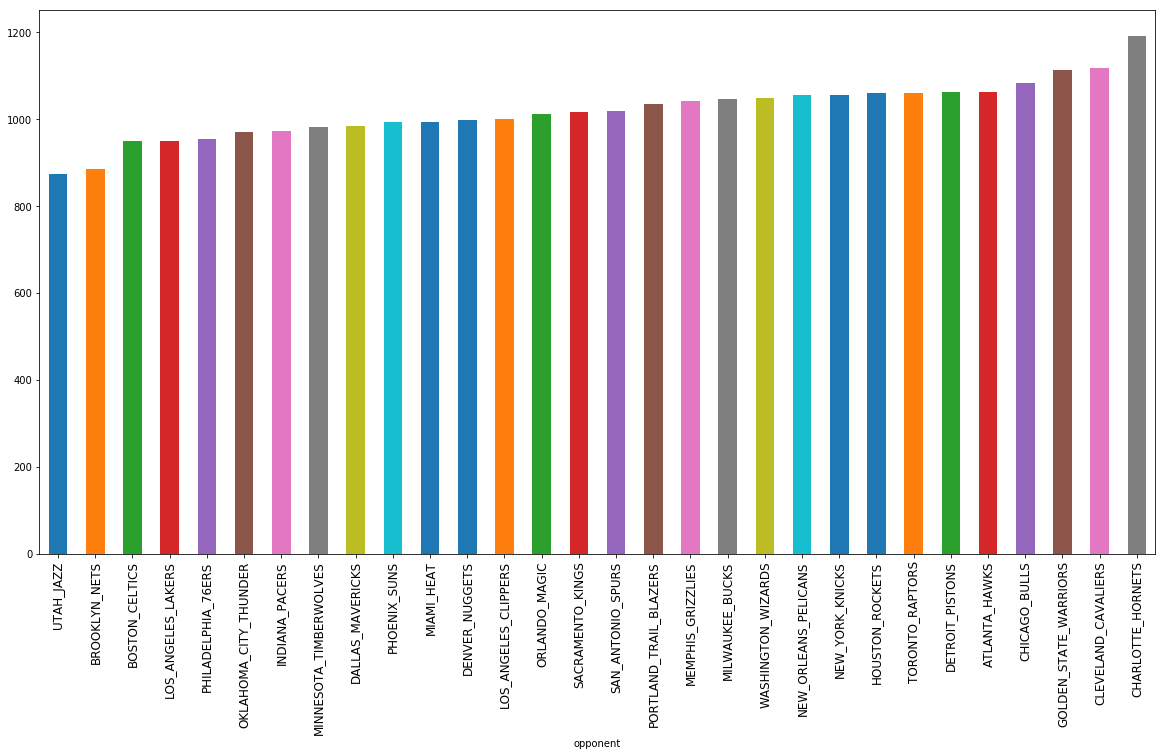

In [25]:
# need to control by number of games
ax = boxscores.groupby('opponent')['assists'].sum().sort_values().plot.bar(figsize=(20,10));
ax.tick_params(axis="x", labelsize=12);